# Introduction to Python for Data Science - Day 2

Welcome to the second day of the course. These notebooks will guide through the two days of the course. 
They are designed for you to repreduce and play, so feel free to modify the content. 

In particular, the course is split into "theory" and "lab" sessions. 
- The theory sessions are in the morning and show hands-on how the main concept works
- The lab session are afternoon exercises designed to understand and try the concepts learn in the morning. 

In this second day, we will look at the main libraries for data analysis, numpy, pandas, and matplotlib. 
Please make sure that the concepts of the first day are well understood and crystalized, as they will be instrumental for the understanding of today's lecture. 

Please create an account in Google to access colab or, if you want, use Jupyter notebook in your laptop. 

**Acknowledgments**

The material in this day is adapted from 
1. Chapters 4, 5, 6 in the book 
> [Python for Data Analysis, 3rd Edition](https://wesmckinney.com/book/) by Wes McKinney, published by O'Reilly Media.
The original jupyter notebooks can be found at the [book's Github repository](https://github.com/wesm/pydata-book/tree/3rd-edition).
  
2. Additional material has been adapted from [Python for Data Science course](https://github.com/worldbank/Python-for-Data-Science/) developed by Nick Jones, Dharana Rijal, Charles Fox and Gaurav Bhardwaj.


## Pandas 
Pandas, a library written by Wes McKinney, is a great tool for data manipulation and analysis. It provides two classes:
* a Series object, which handles a single column of data;
* a DataFrame object, which handles multiple columns (like an Excel spreadsheet).

You can build your own DataFrames or read in from other sources like CSVs or JSON. Pandas handles missing data beautifully; lets you sort, operate on and and merge datasets; provides plotting capabilities; and handles time series data (among other advantages).

In [1]:
# Let's start by importing the libraries

import numpy as np
import pandas as pd

### Creating Series and DataFrames

Series and DataFrames are the basic objects. Sometimes it is useful to import them directly using

```python
from pandas import Series, DataFrame
```

In [2]:
# Create a series by passing a list
towns = pd.Series(['Cardiff', 'Swansea', 'Abergavenny','Machynlleth'])
towns

0        Cardiff
1        Swansea
2    Abergavenny
3    Machynlleth
dtype: object

Series are indexed objects, that means that each position in a series is accessible through an identifier. If, like in this case we specify no identifiers, the Series will associate a progressive number to each item. 

In [3]:
towns.array

<PandasArray>
['Cardiff', 'Swansea', 'Abergavenny', 'Machynlleth']
Length: 4, dtype: object

In [4]:
towns.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# you can specify an index
towns = pd.Series(['Cardiff', 'Swansea', 'Abergavenny','Machynlleth'], index=['C', 'S', 'A' ,'M'])

# or alternatively 
# towns = pd.Series({'C':'Cardiff', 'S':'Swansea', 'A': 'Abergavenny','M': 'Machynlleth'})

# Setting the index name
towns.index.name = "Initials"

# Print the index
towns.index

Index(['C', 'S', 'A', 'M'], dtype='object', name='Initials')

In [6]:
# Back to dictionary
towns.to_dict()

{'C': 'Cardiff', 'S': 'Swansea', 'A': 'Abergavenny', 'M': 'Machynlleth'}

Access each element using the index

In [7]:
towns['A']

'Abergavenny'

#### Simple operations

Pandas supports a number of simple operations, such as summation, division, not-a-number (NA) check

In [8]:
pd.isna(towns)
pd.notna(towns)

Initials
C    True
S    True
A    True
M    True
dtype: bool

### Data Frames

While series are the basic Pandas bricks, data Frames are the containers for datasets that will allow for more complex data analyses. A DataFrame is a table with rows, representing single data points, and columns representing attributes or features. A DataFrame has both column and row indexes, making easier to search for specific values. 

In [9]:
populations = [335145, 230300, 12515, 2235]
number_of_pubs = [2100, 1680, 198, 48]

In [10]:
# Create an empty DataFrame, and add new columns to it

towns_df = pd.DataFrame()
towns_df['name'] = towns
towns_df['population'] = populations

In [11]:
# The columns have different dtypes

towns_df.dtypes

name          object
population     int64
dtype: object

In [12]:
towns_df.array

AttributeError: 'DataFrame' object has no attribute 'array'

We can create dataframes from dictionaries directly.

In [13]:
# Create a DataFrame using dictionaries to specify column name and data

towns_df = pd.DataFrame({'name': towns,
                         'population': populations,
                         'n_pubs': number_of_pubs})

towns_df

,name,population,n_pubs
Initials,,,
C,Cardiff,335145,2100
S,Swansea,230300,1680
A,Abergavenny,12515,198
M,Machynlleth,2235,48


#### View and select data

Pandas offers a number of functions to view the data.

In [14]:
# the .head() method shows the top rows 

towns_df.head(2)

,name,population,n_pubs
Initials,,,
C,Cardiff,335145,2100
S,Swansea,230300,1680


**Note**: The number in the parenthesis is optional and indicates how many rows to show. 

In [15]:
# similarly .tail() shows the bottom rows

towns_df.tail(2)

,name,population,n_pubs
Initials,,,
A,Abergavenny,12515,198
M,Machynlleth,2235,48


In [16]:
# check how many rows and columns
towns_df.shape

(4, 3)

In [17]:
# Inspect only one series using square bracket notation

towns_df['population']

Initials
C    335145
S    230300
A     12515
M      2235
Name: population, dtype: int64

In [18]:
# Or dot notation

towns_df.population

Initials
C    335145
S    230300
A     12515
M      2235
Name: population, dtype: int64

In [19]:
# Standard Python indexing works

towns_df.n_pubs[:3]

Initials
C    2100
S    1680
A     198
Name: n_pubs, dtype: int64

#### Operate on columns

In [20]:
# Use Boolean indexing to inspect values based on a condition

towns_df[towns_df.name == 'Abergavenny']

,name,population,n_pubs
Initials,,,
A,Abergavenny,12515,198


In [21]:
# Create a new column with math outputs

towns_df['pubs_per_capita'] = towns_df.n_pubs / towns_df.population
towns_df['people_per_pub'] = towns_df.population / towns_df.n_pubs

towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub
Initials,,,,,
C,Cardiff,335145,2100,0.006266,159.592857
S,Swansea,230300,1680,0.007295,137.083333
A,Abergavenny,12515,198,0.015821,63.207071
M,Machynlleth,2235,48,0.021477,46.562500


In [22]:
# Create a new column and assign a default value

towns_df['has_mountains'] = False

towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub,has_mountains
Initials,,,,,,
C,Cardiff,335145,2100,0.006266,159.592857,False
S,Swansea,230300,1680,0.007295,137.083333,False
A,Abergavenny,12515,198,0.015821,63.207071,False
M,Machynlleth,2235,48,0.021477,46.562500,False


One of the powerful features of Pandas is its ability to select columns or rows matching a specific condition. 

In [23]:
# Use a single column's value to select data

towns_df.loc[towns_df.people_per_pub < 150]

,name,population,n_pubs,pubs_per_capita,people_per_pub,has_mountains
Initials,,,,,,
S,Swansea,230300,1680,0.007295,137.083333,False
A,Abergavenny,12515,198,0.015821,63.207071,False
M,Machynlleth,2235,48,0.021477,46.562500,False


In [24]:
# Is this a correct statement? 

towns_df > 50

TypeError: '>' not supported between instances of 'str' and 'int'

As well as assigning values based on a condition

In [25]:
towns_df['crowded_pubs'] = towns_df.people_per_pub > 150

towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub,has_mountains,crowded_pubs
Initials,,,,,,,
C,Cardiff,335145,2100,0.006266,159.592857,False,True
S,Swansea,230300,1680,0.007295,137.083333,False,False
A,Abergavenny,12515,198,0.015821,63.207071,False,False
M,Machynlleth,2235,48,0.021477,46.562500,False,False


In [26]:
# drop a colum with del

del towns_df['has_mountains']

towns_df.columns

Index(['name', 'population', 'n_pubs', 'pubs_per_capita', 'people_per_pub',
       'crowded_pubs'],
      dtype='object')

In [27]:
# Use the .sort_values() method

towns_df.sort_values(by = 'people_per_pub')

,name,population,n_pubs,pubs_per_capita,people_per_pub,crowded_pubs
Initials,,,,,,
M,Machynlleth,2235,48,0.021477,46.562500,False
A,Abergavenny,12515,198,0.015821,63.207071,False
S,Swansea,230300,1680,0.007295,137.083333,False
C,Cardiff,335145,2100,0.006266,159.592857,True


In [28]:
# Transposing a dataframe

towns_df.T

Initials,C,S,A,M
name,Cardiff,Swansea,Abergavenny,Machynlleth
population,335145,230300,12515,2235
n_pubs,2100,1680,198,48
pubs_per_capita,0.006266,0.007295,0.015821,0.021477
people_per_pub,159.592857,137.083333,63.207071,46.5625
crowded_pubs,True,False,False,False


In [29]:
# Convert a DF to a ndarray

towns_df.to_numpy()

array([['Cardiff', 335145, 2100, 0.0062659445911471155,
        159.59285714285716, True],
       ['Swansea', 230300, 1680, 0.00729483282674772, 137.08333333333334,
        False],
       ['Abergavenny', 12515, 198, 0.015821014782261285,
        63.207070707070706, False],
       ['Machynlleth', 2235, 48, 0.021476510067114093, 46.5625, False]],
      dtype=object)

#### Operate on rows

``loc`` method allows for selecting a row using the row index. 

In [30]:
towns_df.loc['S']

name                  Swansea
population             230300
n_pubs                   1680
pubs_per_capita      0.007295
people_per_pub     137.083333
crowded_pubs            False
Name: S, dtype: object

Use iloc to select a certain row number

In [31]:
# Selects the second and the third row

towns_df.iloc[[1,2]]

,name,population,n_pubs,pubs_per_capita,people_per_pub,crowded_pubs
Initials,,,,,,
S,Swansea,230300,1680,0.007295,137.083333,False
A,Abergavenny,12515,198,0.015821,63.207071,False


In [32]:
# Select second row and second column

towns_df.iloc[1, 1]

230300

These operations allow for manipulating rows and columns at the same time

In [33]:
# Slicing

n_pubs = towns_df.loc[:, ['name', 'n_pubs']]
n_pubs.loc[:,'n_pubs'] = 0
n_pubs

,name,n_pubs
Initials,,
C,Cardiff,0
S,Swansea,0
A,Abergavenny,0
M,Machynlleth,0


**Important**: Always use loc if you want to ensure the proper access to the right elements and that a _copy_ of a slice is returend

In [34]:
# The original DF is unaffected!

towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub,crowded_pubs
Initials,,,,,,
C,Cardiff,335145,2100,0.006266,159.592857,True
S,Swansea,230300,1680,0.007295,137.083333,False
A,Abergavenny,12515,198,0.015821,63.207071,False
M,Machynlleth,2235,48,0.021477,46.562500,False


List of all the main indexing function

| Type                  | Notes                                                                                                                                                                                                 |
| --------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `df[column]`          | Select single column or sequence of columns from the DataFrame; special case conveniences: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criterion) |
| `df.loc[rows]`        | Select single row or subset of rows from the DataFrame by label                                                                                                                                       |
| `df.loc[:, cols]`     | Select single column or subset of columns by label                                                                                                                                                    |
| `df.loc[rows, cols]`  | Select both row(s) and column(s) by label                                                                                                                                                             |
| `df.iloc[rows]`       | Select single row or subset of rows from the DataFrame by integer position                                                                                                                            |
| `df.iloc[:, cols]`    | Select single column or subset of columns by integer position                                                                                                                                         |
| `df.iloc[rows, cols]` | Select both row(s) and column(s) by integer position                                                                                                                                                  |
| `df.at[row, col]`     | Select a single scalar value by row and column label                                                                                                                                                  |
| `df.iat[row, col]`    | Select a single scalar value by row and column position (integers)                                                                                                                                    |
| `reindex` method      | Select either rows or columns by labels                                                                                                                                                               |

### Manipulating indexes

An index of a DataFrame associates each row to a value

In [35]:
# changing the index of a DataFrams

towns_df.index = ['C', 'S','A', 'M']
towns_df

,name,population,n_pubs,pubs_per_capita,people_per_pub,crowded_pubs
C,Cardiff,335145,2100,0.006266,159.592857,True
S,Swansea,230300,1680,0.007295,137.083333,False
A,Abergavenny,12515,198,0.015821,63.207071,False
M,Machynlleth,2235,48,0.021477,46.562500,False


In [36]:
# Each column has the sam index

towns_df['population'].index

Index(['C', 'S', 'A', 'M'], dtype='object')

Reindex means to change the current index on data to reflect the new index. If a row does not exists, a new one is created with empty values

In [37]:
towns_df.reindex(['C', 'S', 'A', 'M', 'B'])

,name,population,n_pubs,pubs_per_capita,people_per_pub,crowded_pubs
C,Cardiff,335145.0,2100.0,0.006266,159.592857,True
S,Swansea,230300.0,1680.0,0.007295,137.083333,False
A,Abergavenny,12515.0,198.0,0.015821,63.207071,False
M,Machynlleth,2235.0,48.0,0.021477,46.562500,False
B,NaN,NaN,NaN,NaN,NaN,NaN


### Basic operations with multiple Data Frames

Pandas suppports a wealth of algebraic operations among series and data frames.

In [38]:
t2 = pd.DataFrame(np.arange(8.).reshape((4, 2)), columns=['population', 'n_pubs'],
                   index=["C", "S", "D", "L"])
t2

,population,n_pubs
C,0.0,1.0
S,2.0,3.0
D,4.0,5.0
L,6.0,7.0


In [39]:
# Summing two data frames sums rows and columns common to both dataframes, and reindex the original DF creating rows with NaN

towns_df + t2

,crowded_pubs,n_pubs,name,people_per_pub,population,pubs_per_capita
A,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,2101.0,NaN,NaN,335145.0,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN
L,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,NaN,NaN,NaN,NaN,NaN
S,NaN,1683.0,NaN,NaN,230302.0,NaN


In [40]:
# Create a slice to avoid filling with NaN

t1 = towns_df.loc[:,['n_pubs', 'population']]

t1.add(t2, fill_value=0)

,n_pubs,population
A,198.0,12515.0
C,2101.0,335145.0
D,5.0,4.0
L,7.0,6.0
M,48.0,2235.0
S,1683.0,230302.0


In [41]:
# Similarly it is possible to perform row by row summations

towns_df = towns_df.loc[:,['n_pubs', 'population', 'people_per_pub']]

new_borns = pd.Series(np.random.randint(100, 1000, size=4), index=towns_df.index)
print(new_borns)

towns_df.loc[:,'population'] + new_borns


C    598
S    458
A    939
M    475
dtype: int64


C    335743
S    230758
A     13454
M      2710
dtype: int64

#### Function application

In [42]:
# Apply functions to each column 

def f1(x):
    return x.max() - x.min()

towns_df.apply(f1)

n_pubs              2052.000000
population        332910.000000
people_per_pub       113.030357
dtype: float64

In [43]:
# Apply functions per row

towns_df.apply(f1, axis="columns")

C    334985.407143
S    230162.916667
A     12451.792929
M      2188.437500
dtype: float64

In [44]:
# Apply functions to each element

def binarize(x):
    return 1 if x > 1000 else 0

towns_df.applymap(binarize)

,n_pubs,population,people_per_pub
C,1,1,0
S,1,1,0
A,0,1,0
M,0,1,0


In [45]:
# Sorting values

towns_df.sort_values('population')

,n_pubs,population,people_per_pub
M,48,2235,46.562500
A,198,12515,63.207071
S,1680,230300,137.083333
C,2100,335145,159.592857


### Descriptive Statistics 

In [46]:
# Sum of all the columns

towns_df.sum()

n_pubs              4026.000000
population        580195.000000
people_per_pub       406.445761
dtype: float64

In [47]:
# Sum of all the rows

towns_df.sum(axis="columns")

C    337404.592857
S    232117.083333
A     12776.207071
M      2329.562500
dtype: float64

In [48]:
towns_df.sum(axis="index", skipna=False)

n_pubs              4026.000000
population        580195.000000
people_per_pub       406.445761
dtype: float64

In [49]:
# Compute the mean across all columns
towns_df.mean(axis="columns")

C    112468.197619
S     77372.361111
A      4258.735690
M       776.520833
dtype: float64

In [50]:
# Return the row containing the maximum for each column
towns_df.idxmax()

n_pubs            C
population        C
people_per_pub    C
dtype: object

In [51]:
# Return a set of basic statistics
towns_df.describe()

,n_pubs,population,people_per_pub
count,4.000000,4.000000,4.000000
mean,1006.500000,145048.750000,101.611440
std,1036.297737,164686.896836,55.152459
min,48.000000,2235.000000,46.562500
25%,160.500000,9945.000000,59.045928
50%,939.000000,121407.500000,100.145202
75%,1785.000000,256511.250000,142.710714
max,2100.000000,335145.000000,159.592857


In [52]:
# Covariances
towns_df.cov()

,n_pubs,population,people_per_pub
n_pubs,1.073913e+06,1.697758e+08,5.703578e+04
population,1.697758e+08,2.712177e+10,8.999231e+06
people_per_pub,5.703578e+04,8.999231e+06,3.041794e+03


In [53]:
# Correlations
towns_df.corr()

,n_pubs,population,people_per_pub
n_pubs,1.000000,0.994792,0.997925
population,0.994792,1.000000,0.990790
people_per_pub,0.997925,0.990790,1.000000


### Bonus: Plot outputs

You will see more in the afternoon, but this is something interesting that you can do with Pandas

<AxesSubplot:title={'center':'Some great towns to visit'}, xlabel='name'>

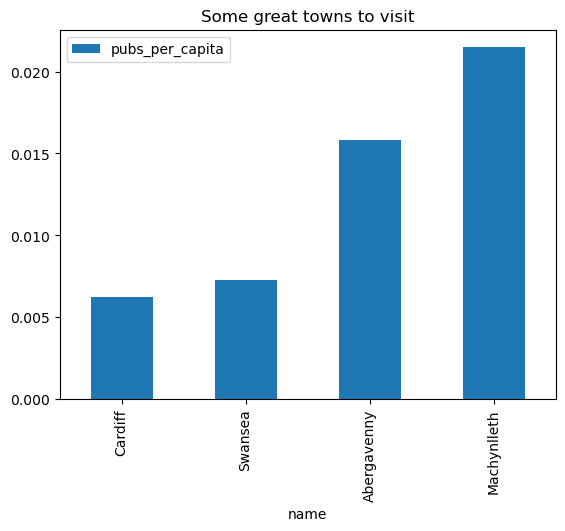

In [54]:
import matplotlib

# Plot charts using the .plot() method 
towns_df['name'] = towns
towns_df['pubs_per_capita'] = towns_df.n_pubs / towns_df.population

towns_df.plot(x = 'name', y = 'pubs_per_capita', kind = 'bar', title = 'Some great towns to visit')